In [1]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import sys
import os
import curvedsky as cs
import pickle as pl

In [2]:
sys.path.append('../')

In [3]:
%load_ext autoreload
%autoreload 2
from simulation import SimExperimentFG
from filtering import Filtering
from quest import Reconstruction
from quest import N1

In [4]:
n1 = N1('../LB_FG0_n1.ini','../LB_FG0.ini')

/project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps_c/CMB/
using /project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps_c/CMB/ and /global/cscratch1/sd/lonappan/S4BIRD/FG saving to /global/cscratch1/sd/lonappan/S4BIRD/N1/noFG
/project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps/CMB/
using /project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps/CMB/ and /global/cscratch1/sd/lonappan/S4BIRD/FG saving to /global/cscratch1/sd/lonappan/S4BIRD/DELL/noFG
Calculating n1


corss spectra stat: 100%|██████████| 500/500 [00:54<00:00,  9.12simulation/s]


In [32]:
rec0 = Reconstruction.from_ini('../LB_FG0.ini')
#rec1 = Reconstruction.from_ini('../LB_FG0_.ini')


/project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps/CMB/
using /project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps/CMB/ and /global/cscratch1/sd/lonappan/S4BIRD/FG saving to /global/cscratch1/sd/lonappan/S4BIRD/DELL/noFG


In [33]:
rec0_stat = rec0.get_qcl_wR_stat(100,n1=True)
#rec1_stat = rec1.get_qcl_wR_stat(100,n1=True)


Calculating Response: 100%|██████████| 500/500 [00:09<00:00, 51.98Simulation/s]
/global/u2/l/lonappan/workspace/LBlens/Notebooks/../quest.py:395: RuntimeWarning: invalid value encountered in true_divide
  elif ret == 'dl':
qcl stat: 100%|██████████| 100/100 [01:12<00:00,  1.38simulation/s]


In [22]:
rec0_stat_w_n1 = rec0.get_qcl_wR_stat(n=400,n1=True)

qcl stat: 100%|██████████| 400/400 [00:36<00:00, 10.88simulation/s]


Text(0.5, 1.0, 'no FG')

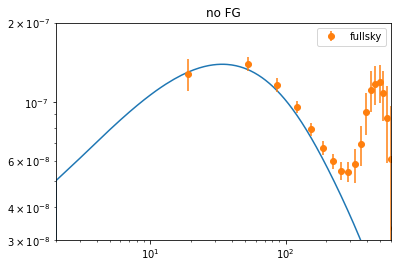

In [34]:
plt.loglog(rec0.cl_pp*rec0.Lfac)
plt.errorbar(rec0.B,rec0_stat.mean(axis=0),rec0_stat.std(axis=0),fmt='o',label='fullsky')
#plt.errorbar(rec0.B,rec1_stat.mean(axis=0),rec0_stat.std(axis=0),fmt='o',label='cutsky')
plt.xlim(2,600)
plt.ylim(3e-8,2e-7)
plt.legend()
plt.title('no FG')

/global/u2/l/lonappan/workspace/LBlens/Notebooks/../quest.py:243: RuntimeWarning: invalid value encountered in true_divide
  fl = self.cl_pp/(self.cl_pp+ nhl )


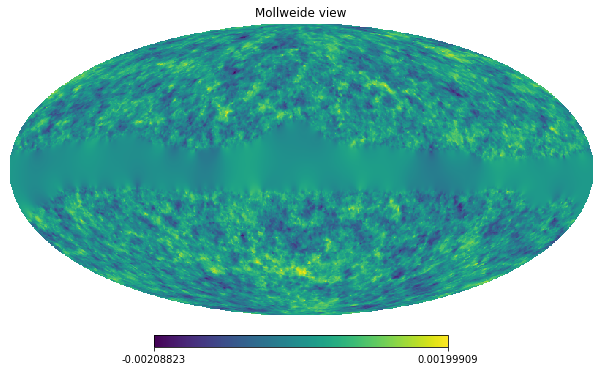

In [30]:
hp.mollview(rec1.deflection_map(0))

/global/u2/l/lonappan/workspace/LBlens/Notebooks/../quest.py:243: RuntimeWarning: invalid value encountered in true_divide
  fl = self.cl_pp/(self.cl_pp+ nhl )


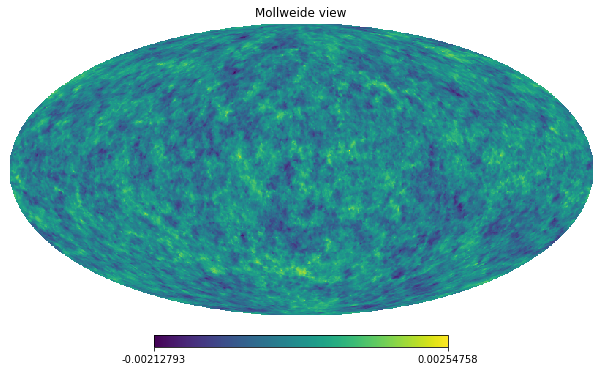

In [31]:
hp.mollview(rec0.deflection_map(0))

100


/tmp/ipykernel_7086/1064281079.py:4: RuntimeWarning: invalid value encountered in true_divide
  plt.loglog((rec0.N1/rec0.response_mean()**2) *rec0.Lfac,label='N1')
/tmp/ipykernel_7086/1064281079.py:5: RuntimeWarning: invalid value encountered in true_divide
  plt.loglog((rec0.mean_field_cl()/rec0.response_mean()**2) *rec0.Lfac,label='MF')
/tmp/ipykernel_7086/1064281079.py:6: RuntimeWarning: invalid value encountered in true_divide
  plt.loglog((rec0.MCN0()/rec0.response_mean()**2) * rec0.Lfac,label='MCN0')


Text(0.5, 1.0, 's1d1')

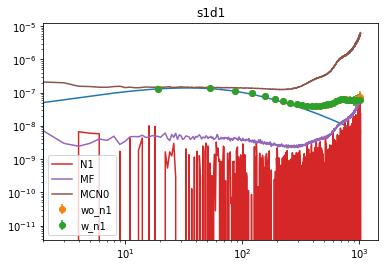

In [18]:
plt.loglog(rec0.cl_pp*rec0.Lfac)
plt.errorbar(rec0.B,rec0_stat_wo_n1.mean(axis=0),rec0_stat_wo_n1.std(axis=0),fmt='o',label='wo_n1')
plt.errorbar(rec0.B,rec0_stat_w_n1.mean(axis=0),rec0_stat_w_n1.std(axis=0),fmt='o',label='w_n1')
plt.loglog((rec0.N1/rec0.response_mean()**2) *rec0.Lfac,label='N1')
plt.loglog((rec0.mean_field_cl()/rec0.response_mean()**2) *rec0.Lfac,label='MF')
plt.loglog((rec0.MCN0()/rec0.response_mean()**2) * rec0.Lfac,label='MCN0')

plt.xlim(2,None)
#plt.ylim(3e-8,2e-7)
plt.legend()
plt.title('s1d1')

/tmp/ipykernel_62547/3887857472.py:1: RuntimeWarning: divide by zero encountered in true_divide
  r = 1/rec0.response_mean()**2
/tmp/ipykernel_62547/3887857472.py:5: RuntimeWarning: invalid value encountered in multiply
  plt.loglog(f*r*rec0.Lfac,label='phi')
/tmp/ipykernel_62547/3887857472.py:6: RuntimeWarning: invalid value encountered in multiply
  plt.loglog(rec0.N1*r*rec0.Lfac,label='N1')


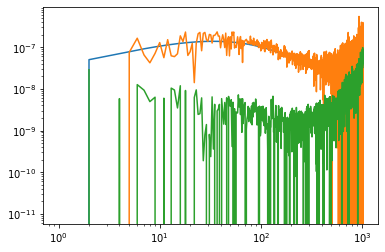

In [6]:

r = 1/rec0.response_mean()**2

f = rec0.get_phi_cl(0) - rec0.MCN0()  - rec0.N1 -((rec0.MCN0() + rec0.cl_pp)/100)
plt.loglog(rec0.cl_pp*rec0.Lfac)
plt.loglog(f*r*rec0.Lfac,label='phi')
plt.loglog(rec0.N1*r*rec0.Lfac,label='N1')

100
100


Text(0.5, 1.0, 'mean field')

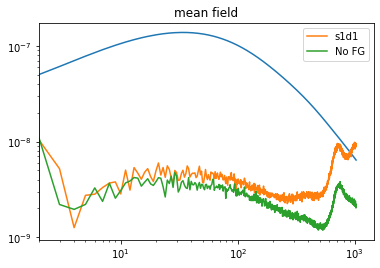

In [35]:
plt.loglog(rec0.cl_pp*rec0.Lfac)
plt.loglog(rec1.mean_field_cl() *rec1.Lfac,label='s1d1')
plt.loglog(rec0.mean_field_cl() *rec1.Lfac,label='No FG')
plt.xlim(2,None)
plt.legend()
plt.title('mean field')

In [23]:
rec0.N1

array([ 0.00000000e+00,  0.00000000e+00, -2.00782497e-10, ...,
        5.59524862e-21,  4.74791862e-21, -4.00915249e-21])

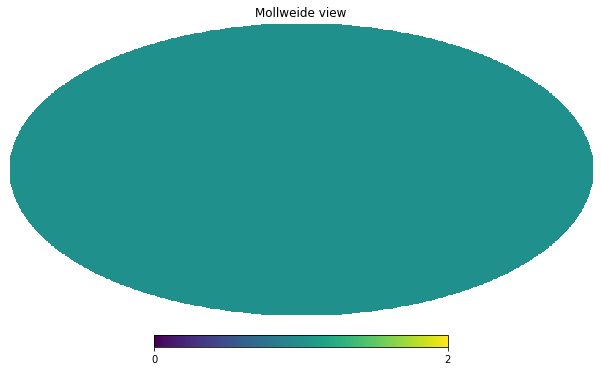

In [43]:
hp.mollview(rec0.mask)

In [20]:
rec0.fsky

1.0